In [9]:
import hdf5storage
import datetime
from datetime import date
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import MSD

In [3]:
#load data
mat1 = hdf5storage.loadmat('precip_1979.mat')
arrays1 = {}
for k, v in mat1.items():
    arrays1[k] = np.array(v)
p1=np.concatenate(list(arrays1.values()))
precip=p1
for n in range(1980,2018):
    print('opening'+str(n))
    filename='precip_'+str(n)+'.mat'
    mat = hdf5storage.loadmat(filename)
    a = {}
    for k, v in mat.items():
        a[k] = np.array(v)
    p=np.concatenate(list(a.values()))
    precip=np.concatenate((precip,p),axis=2)

opening1980
opening1981
opening1982
opening1983
opening1984
opening1985
opening1986
opening1987
opening1988
opening1989
opening1990
opening1991
opening1992
opening1993
opening1994
opening1995
opening1996
opening1997
opening1998
opening1999
opening2000
opening2001
opening2002
opening2003
opening2004
opening2005
opening2006
opening2007
opening2008
opening2009
opening2010
opening2011
opening2012
opening2013
opening2014
opening2015
opening2016
opening2017


In [4]:
time=np.arange(date.toordinal(date(1979,1,1)),date.toordinal(date(2017,12,31))+1)
lat_full=np.ones((120,60))

In [5]:
precip=MSD.interpnan(precip,time)

## Soh

In [8]:
expv=MSD.soh(precip,time,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:27: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,i]=np.nanmean(precip[:,:,index_here],axis=2)


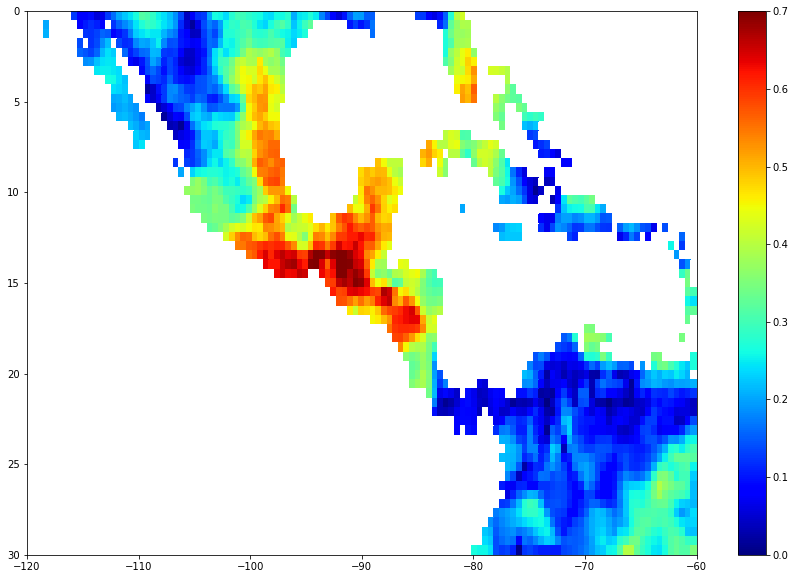

In [13]:
#plot results of soh
fig=plt.figure(figsize=(15,10))
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array ( expv, mask=np.isnan(expv)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='jet',vmin=0,vmax=0.7)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

## Detect_monthly

In [5]:
time=np.arange(date.toordinal(date(1979,1,1)),date.toordinal(date(2017,12,31))+1)
date_used=np.full([len(time),2],np.nan,dtype=int)
for ind,day in enumerate(time):
    date_used[ind,0]=date.fromordinal(day).year
    date_used[ind,1]=date.fromordinal(day).month
u_y_m=np.unique(date_used,axis=0)   

In [6]:
precip_month=np.full([precip.shape[0],precip.shape[1],u_y_m.shape[0]],np.nan)
for i,t in enumerate(u_y_m):
    index_here= np.logical_and(date_used[:,0]==t[0],date_used[:,1]==t[1])
    precip_month[:,:,i]=np.nanmean(precip[:,:,index_here],axis=2)

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [7]:
lat_full=np.ones((120,60))

In [7]:
depth,onset,ending=MSD.detect_monthly(precip_month,u_y_m,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:60: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,m]=np.nanmean(precip[:,:,index_here],axis=2)


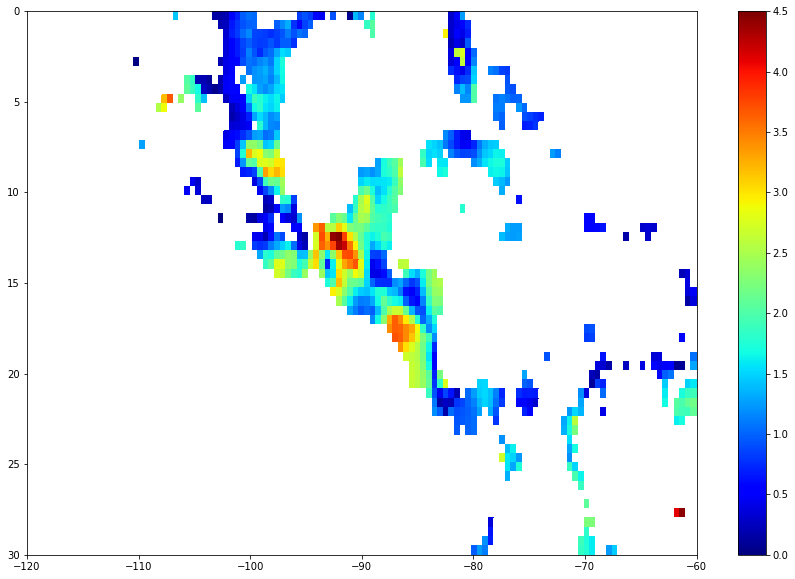

In [11]:
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
fig=plt.figure(figsize=(15,10))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array ( depth, mask=np.isnan(depth)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='jet',vmin=0,vmax=4.5)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

## Detect_mg

In [8]:
dur,RD,label=MSD.detect_mg(precip_month,u_y_m,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:125: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,m]=np.nanmean(precip[:,:,index_here],axis=2)


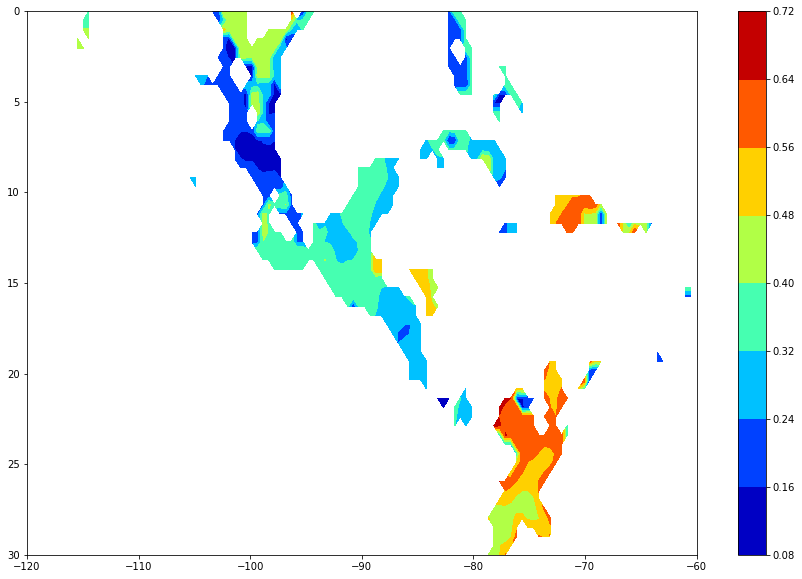

In [9]:
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
fig=plt.figure(figsize=(15,10))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array ( RD, mask=np.isnan(RD)) 
plt.contourf(lon,lat,A.transpose(),cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.show()

## Detect_quadrant

In [8]:
BI=MSD.detect_quadrant(precip_month,u_y_m,lat_full)

/Users/apple/Desktop/MSD_test/MSD.py:208: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,m]=np.nanmean(precip[:,:,index_here],axis=2)


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


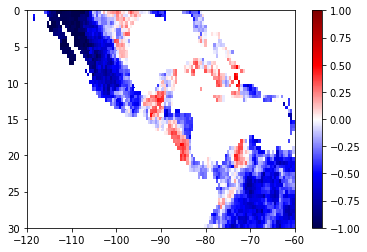

In [9]:
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
cmap = matplotlib.cm.seismic
cmap.set_bad('white',1.)
BI1=np.nanmean(BI,axis=2)
A = np.ma.array ( BI1, mask=np.isnan(BI1)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='seismic',vmin=-1,vmax=1)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

## Detect_daily

In [6]:
MSD_gs,precip_clim,imsd_climatology=MSD.detect_daily(precip,time,lat_full)

Calculating the climatology


/Users/apple/Desktop/MSD_test/MSD.py:294: RuntimeWarning: Mean of empty slice
  precip_clim[:,:,i]=np.nanmean(precip_for_clim[:,:,index_here],axis=2)


Determining the MSD area, current location: x1 y1
Determining the MSD area, current location: x1 y2
Determining the MSD area, current location: x1 y3
Determining the MSD area, current location: x1 y4
Determining the MSD area, current location: x1 y5
Determining the MSD area, current location: x1 y6
Determining the MSD area, current location: x1 y7
Determining the MSD area, current location: x1 y8
Determining the MSD area, current location: x1 y9
Determining the MSD area, current location: x1 y10
Determining the MSD area, current location: x1 y11
Determining the MSD area, current location: x1 y12
Determining the MSD area, current location: x1 y13
Determining the MSD area, current location: x1 y14
Determining the MSD area, current location: x1 y15
Determining the MSD area, current location: x1 y16
Determining the MSD area, current location: x1 y17
Determining the MSD area, current location: x1 y18
Determining the MSD area, current location: x1 y19
Determining the MSD area, current locati

Determining the MSD area, current location: x8 y12
Determining the MSD area, current location: x8 y13
Determining the MSD area, current location: x8 y14
Determining the MSD area, current location: x8 y15
Determining the MSD area, current location: x8 y16
Determining the MSD area, current location: x8 y17
Determining the MSD area, current location: x8 y18
Determining the MSD area, current location: x8 y19
Determining the MSD area, current location: x8 y20
Determining the MSD area, current location: x8 y21
Determining the MSD area, current location: x8 y22
Determining the MSD area, current location: x8 y23
Determining the MSD area, current location: x8 y24
Determining the MSD area, current location: x8 y25
Determining the MSD area, current location: x8 y26
Determining the MSD area, current location: x8 y27
Determining the MSD area, current location: x8 y28
Determining the MSD area, current location: x8 y29
Determining the MSD area, current location: x8 y30
Determining the MSD area, curre

Determining the MSD area, current location: x14 y20
Determining the MSD area, current location: x14 y21
Determining the MSD area, current location: x14 y22
Determining the MSD area, current location: x14 y23
Determining the MSD area, current location: x14 y24
Determining the MSD area, current location: x14 y25
Determining the MSD area, current location: x14 y26
Determining the MSD area, current location: x14 y27
Determining the MSD area, current location: x14 y28
Determining the MSD area, current location: x14 y29
Determining the MSD area, current location: x14 y30
Determining the MSD area, current location: x14 y31
Determining the MSD area, current location: x14 y32
Determining the MSD area, current location: x14 y33
Determining the MSD area, current location: x14 y34
Determining the MSD area, current location: x14 y35
Determining the MSD area, current location: x14 y36
Determining the MSD area, current location: x14 y37
Determining the MSD area, current location: x14 y38
Determining 

Determining the MSD area, current location: x17 y14
Determining the MSD area, current location: x17 y15
Determining the MSD area, current location: x17 y16
Determining the MSD area, current location: x17 y17
Determining the MSD area, current location: x17 y18
Determining the MSD area, current location: x17 y19
Determining the MSD area, current location: x17 y20
Determining the MSD area, current location: x17 y21
Determining the MSD area, current location: x17 y22
Determining the MSD area, current location: x17 y23
Determining the MSD area, current location: x17 y24
Determining the MSD area, current location: x17 y25
Determining the MSD area, current location: x17 y26
Determining the MSD area, current location: x17 y27
Determining the MSD area, current location: x17 y28
Determining the MSD area, current location: x17 y29
Determining the MSD area, current location: x17 y30
Determining the MSD area, current location: x17 y31
Determining the MSD area, current location: x17 y32
Determining 

Determining the MSD area, current location: x24 y46
Determining the MSD area, current location: x24 y47
Determining the MSD area, current location: x24 y48
Determining the MSD area, current location: x24 y49
Determining the MSD area, current location: x24 y50
Determining the MSD area, current location: x24 y51
Determining the MSD area, current location: x24 y52
Determining the MSD area, current location: x24 y53
Determining the MSD area, current location: x24 y54
Determining the MSD area, current location: x24 y55
Determining the MSD area, current location: x24 y56
Determining the MSD area, current location: x24 y57
Determining the MSD area, current location: x24 y58
Determining the MSD area, current location: x24 y59
Determining the MSD area, current location: x24 y60
Determining the MSD area, current location: x25 y1
Determining the MSD area, current location: x25 y2
Determining the MSD area, current location: x25 y3
Determining the MSD area, current location: x25 y4
Determining the 

Determining the MSD area, current location: x31 y46
Determining the MSD area, current location: x31 y47
Determining the MSD area, current location: x31 y48
Determining the MSD area, current location: x31 y49
Determining the MSD area, current location: x31 y50
Determining the MSD area, current location: x31 y51
Determining the MSD area, current location: x31 y52
Determining the MSD area, current location: x31 y53
Determining the MSD area, current location: x31 y54
Determining the MSD area, current location: x31 y55
Determining the MSD area, current location: x31 y56
Determining the MSD area, current location: x31 y57
Determining the MSD area, current location: x31 y58
Determining the MSD area, current location: x31 y59
Determining the MSD area, current location: x31 y60
Determining the MSD area, current location: x32 y1
Determining the MSD area, current location: x32 y2
Determining the MSD area, current location: x32 y3
Determining the MSD area, current location: x32 y4
Determining the 

Determining the MSD area, current location: x37 y60
Determining the MSD area, current location: x38 y1
Determining the MSD area, current location: x38 y2
Determining the MSD area, current location: x38 y3
Determining the MSD area, current location: x38 y4
Determining the MSD area, current location: x38 y5
Determining the MSD area, current location: x38 y6
Determining the MSD area, current location: x38 y7
Determining the MSD area, current location: x38 y8
Determining the MSD area, current location: x38 y9
Determining the MSD area, current location: x38 y10
Determining the MSD area, current location: x38 y11
Determining the MSD area, current location: x38 y12
Determining the MSD area, current location: x38 y13
Determining the MSD area, current location: x38 y14
Determining the MSD area, current location: x38 y15
Determining the MSD area, current location: x38 y16
Determining the MSD area, current location: x38 y17
Determining the MSD area, current location: x38 y18
Determining the MSD a

Determining the MSD area, current location: x41 y11
Determining the MSD area, current location: x41 y12
Determining the MSD area, current location: x41 y13
Determining the MSD area, current location: x41 y14
Determining the MSD area, current location: x41 y15
Determining the MSD area, current location: x41 y16
Determining the MSD area, current location: x41 y17
Determining the MSD area, current location: x41 y18
Determining the MSD area, current location: x41 y19
Determining the MSD area, current location: x41 y20
Determining the MSD area, current location: x41 y21
Determining the MSD area, current location: x41 y22
Determining the MSD area, current location: x41 y23
Determining the MSD area, current location: x41 y24
Determining the MSD area, current location: x41 y25
Determining the MSD area, current location: x41 y26
Determining the MSD area, current location: x41 y27
Determining the MSD area, current location: x41 y28
Determining the MSD area, current location: x41 y29
Determining 

Determining the MSD area, current location: x44 y7
Determining the MSD area, current location: x44 y8
Determining the MSD area, current location: x44 y9
Determining the MSD area, current location: x44 y10
Determining the MSD area, current location: x44 y11
Determining the MSD area, current location: x44 y12
Determining the MSD area, current location: x44 y13
Determining the MSD area, current location: x44 y14
Determining the MSD area, current location: x44 y15
Determining the MSD area, current location: x44 y16
Determining the MSD area, current location: x44 y17
Determining the MSD area, current location: x44 y18
Determining the MSD area, current location: x44 y19
Determining the MSD area, current location: x44 y20
Determining the MSD area, current location: x44 y21
Determining the MSD area, current location: x44 y22
Determining the MSD area, current location: x44 y23
Determining the MSD area, current location: x44 y24
Determining the MSD area, current location: x44 y25
Determining the

Determining the MSD area, current location: x46 y55
Determining the MSD area, current location: x46 y56
Determining the MSD area, current location: x46 y57
Determining the MSD area, current location: x46 y58
Determining the MSD area, current location: x46 y59
Determining the MSD area, current location: x46 y60
Determining the MSD area, current location: x47 y1
Determining the MSD area, current location: x47 y2
Determining the MSD area, current location: x47 y3
Determining the MSD area, current location: x47 y4
Determining the MSD area, current location: x47 y5
Determining the MSD area, current location: x47 y6
Determining the MSD area, current location: x47 y7
Determining the MSD area, current location: x47 y8
Determining the MSD area, current location: x47 y9
Determining the MSD area, current location: x47 y10
Determining the MSD area, current location: x47 y11
Determining the MSD area, current location: x47 y12
Determining the MSD area, current location: x47 y13
Determining the MSD a

Determining the MSD area, current location: x52 y45
Determining the MSD area, current location: x52 y46
Determining the MSD area, current location: x52 y47
Determining the MSD area, current location: x52 y48
Determining the MSD area, current location: x52 y49
Determining the MSD area, current location: x52 y50
Determining the MSD area, current location: x52 y51
Determining the MSD area, current location: x52 y52
Determining the MSD area, current location: x52 y53
Determining the MSD area, current location: x52 y54
Determining the MSD area, current location: x52 y55
Determining the MSD area, current location: x52 y56
Determining the MSD area, current location: x52 y57
Determining the MSD area, current location: x52 y58
Determining the MSD area, current location: x52 y59
Determining the MSD area, current location: x52 y60
Determining the MSD area, current location: x53 y1
Determining the MSD area, current location: x53 y2
Determining the MSD area, current location: x53 y3
Determining the

Determining the MSD area, current location: x57 y33
Determining the MSD area, current location: x57 y34
Determining the MSD area, current location: x57 y35
Determining the MSD area, current location: x57 y36
Determining the MSD area, current location: x57 y37
Determining the MSD area, current location: x57 y38
Determining the MSD area, current location: x57 y39
Determining the MSD area, current location: x57 y40
Determining the MSD area, current location: x57 y41
Determining the MSD area, current location: x57 y42
Determining the MSD area, current location: x57 y43
Determining the MSD area, current location: x57 y44
Determining the MSD area, current location: x57 y45
Determining the MSD area, current location: x57 y46
Determining the MSD area, current location: x57 y47
Determining the MSD area, current location: x57 y48
Determining the MSD area, current location: x57 y49
Determining the MSD area, current location: x57 y50
Determining the MSD area, current location: x57 y51
Determining 

Determining the MSD area, current location: x61 y25
Determining the MSD area, current location: x61 y26
Determining the MSD area, current location: x61 y27
Determining the MSD area, current location: x61 y28
Determining the MSD area, current location: x61 y29
Determining the MSD area, current location: x61 y30
Determining the MSD area, current location: x61 y31
Determining the MSD area, current location: x61 y32
Determining the MSD area, current location: x61 y33
Determining the MSD area, current location: x61 y34
Determining the MSD area, current location: x61 y35
Determining the MSD area, current location: x61 y36
Determining the MSD area, current location: x61 y37
Determining the MSD area, current location: x61 y38
Determining the MSD area, current location: x61 y39
Determining the MSD area, current location: x61 y40
Determining the MSD area, current location: x61 y41
Determining the MSD area, current location: x61 y42
Determining the MSD area, current location: x61 y43
Determining 

Determining the MSD area, current location: x65 y9
Determining the MSD area, current location: x65 y10
Determining the MSD area, current location: x65 y11
Determining the MSD area, current location: x65 y12
Determining the MSD area, current location: x65 y13
Determining the MSD area, current location: x65 y14
Determining the MSD area, current location: x65 y15
Determining the MSD area, current location: x65 y16
Determining the MSD area, current location: x65 y17
Determining the MSD area, current location: x65 y18
Determining the MSD area, current location: x65 y19
Determining the MSD area, current location: x65 y20
Determining the MSD area, current location: x65 y21
Determining the MSD area, current location: x65 y22
Determining the MSD area, current location: x65 y23
Determining the MSD area, current location: x65 y24
Determining the MSD area, current location: x65 y25
Determining the MSD area, current location: x65 y26
Determining the MSD area, current location: x65 y27
Determining t

Determining the MSD area, current location: x69 y42
Determining the MSD area, current location: x69 y43
Determining the MSD area, current location: x69 y44
Determining the MSD area, current location: x69 y45
Determining the MSD area, current location: x69 y46
Determining the MSD area, current location: x69 y47
Determining the MSD area, current location: x69 y48
Determining the MSD area, current location: x69 y49
Determining the MSD area, current location: x69 y50
Determining the MSD area, current location: x69 y51
Determining the MSD area, current location: x69 y52
Determining the MSD area, current location: x69 y53
Determining the MSD area, current location: x69 y54
Determining the MSD area, current location: x69 y55
Determining the MSD area, current location: x69 y56
Determining the MSD area, current location: x69 y57
Determining the MSD area, current location: x69 y58
Determining the MSD area, current location: x69 y59
Determining the MSD area, current location: x69 y60
Determining 

Determining the MSD area, current location: x73 y43
Determining the MSD area, current location: x73 y44
Determining the MSD area, current location: x73 y45
Determining the MSD area, current location: x73 y46
Determining the MSD area, current location: x73 y47
Determining the MSD area, current location: x73 y48
Determining the MSD area, current location: x73 y49
Determining the MSD area, current location: x73 y50
Determining the MSD area, current location: x73 y51
Determining the MSD area, current location: x73 y52
Determining the MSD area, current location: x73 y53
Determining the MSD area, current location: x73 y54
Determining the MSD area, current location: x73 y55
Determining the MSD area, current location: x73 y56
Determining the MSD area, current location: x73 y57
Determining the MSD area, current location: x73 y58
Determining the MSD area, current location: x73 y59
Determining the MSD area, current location: x73 y60
Determining the MSD area, current location: x74 y1
Determining t

Determining the MSD area, current location: x78 y2
Determining the MSD area, current location: x78 y3
Determining the MSD area, current location: x78 y4
Determining the MSD area, current location: x78 y5
Determining the MSD area, current location: x78 y6
Determining the MSD area, current location: x78 y7
Determining the MSD area, current location: x78 y8
Determining the MSD area, current location: x78 y9
Determining the MSD area, current location: x78 y10
Determining the MSD area, current location: x78 y11
Determining the MSD area, current location: x78 y12
Determining the MSD area, current location: x78 y13
Determining the MSD area, current location: x78 y14
Determining the MSD area, current location: x78 y15
Determining the MSD area, current location: x78 y16
Determining the MSD area, current location: x78 y17
Determining the MSD area, current location: x78 y18
Determining the MSD area, current location: x78 y19
Determining the MSD area, current location: x78 y20
Determining the MSD 

Determining the MSD area, current location: x82 y39
Determining the MSD area, current location: x82 y40
Determining the MSD area, current location: x82 y41
Determining the MSD area, current location: x82 y42
Determining the MSD area, current location: x82 y43
Determining the MSD area, current location: x82 y44
Determining the MSD area, current location: x82 y45
Determining the MSD area, current location: x82 y46
Determining the MSD area, current location: x82 y47
Determining the MSD area, current location: x82 y48
Determining the MSD area, current location: x82 y49
Determining the MSD area, current location: x82 y50
Determining the MSD area, current location: x82 y51
Determining the MSD area, current location: x82 y52
Determining the MSD area, current location: x82 y53
Determining the MSD area, current location: x82 y54
Determining the MSD area, current location: x82 y55
Determining the MSD area, current location: x82 y56
Determining the MSD area, current location: x82 y57
Determining 

Determining the MSD area, current location: x86 y11
Determining the MSD area, current location: x86 y12
Determining the MSD area, current location: x86 y13
Determining the MSD area, current location: x86 y14
Determining the MSD area, current location: x86 y15
Determining the MSD area, current location: x86 y16
Determining the MSD area, current location: x86 y17
Determining the MSD area, current location: x86 y18
Determining the MSD area, current location: x86 y19
Determining the MSD area, current location: x86 y20
Determining the MSD area, current location: x86 y21
Determining the MSD area, current location: x86 y22
Determining the MSD area, current location: x86 y23
Determining the MSD area, current location: x86 y24
Determining the MSD area, current location: x86 y25
Determining the MSD area, current location: x86 y26
Determining the MSD area, current location: x86 y27
Determining the MSD area, current location: x86 y28
Determining the MSD area, current location: x86 y29
Determining 

Determining the MSD area, current location: x88 y53
Determining the MSD area, current location: x88 y54
Determining the MSD area, current location: x88 y55
Determining the MSD area, current location: x88 y56
Determining the MSD area, current location: x88 y57
Determining the MSD area, current location: x88 y58
Determining the MSD area, current location: x88 y59
Determining the MSD area, current location: x88 y60
Determining the MSD area, current location: x89 y1
Determining the MSD area, current location: x89 y2
Determining the MSD area, current location: x89 y3
Determining the MSD area, current location: x89 y4
Determining the MSD area, current location: x89 y5
Determining the MSD area, current location: x89 y6
Determining the MSD area, current location: x89 y7
Determining the MSD area, current location: x89 y8
Determining the MSD area, current location: x89 y9
Determining the MSD area, current location: x89 y10
Determining the MSD area, current location: x89 y11
Determining the MSD a

Determining the MSD area, current location: x91 y32
Determining the MSD area, current location: x91 y33
Determining the MSD area, current location: x91 y34
Determining the MSD area, current location: x91 y35
Determining the MSD area, current location: x91 y36
Determining the MSD area, current location: x91 y37
Determining the MSD area, current location: x91 y38
Determining the MSD area, current location: x91 y39
Determining the MSD area, current location: x91 y40
Determining the MSD area, current location: x91 y41
Determining the MSD area, current location: x91 y42
Determining the MSD area, current location: x91 y43
Determining the MSD area, current location: x91 y44
Determining the MSD area, current location: x91 y45
Determining the MSD area, current location: x91 y46
Determining the MSD area, current location: x91 y47
Determining the MSD area, current location: x91 y48
Determining the MSD area, current location: x91 y49
Determining the MSD area, current location: x91 y50
Determining 

Determining the MSD area, current location: x96 y4
Determining the MSD area, current location: x96 y5
Determining the MSD area, current location: x96 y6
Determining the MSD area, current location: x96 y7
Determining the MSD area, current location: x96 y8
Determining the MSD area, current location: x96 y9
Determining the MSD area, current location: x96 y10
Determining the MSD area, current location: x96 y11
Determining the MSD area, current location: x96 y12
Determining the MSD area, current location: x96 y13
Determining the MSD area, current location: x96 y14
Determining the MSD area, current location: x96 y15
Determining the MSD area, current location: x96 y16
Determining the MSD area, current location: x96 y17
Determining the MSD area, current location: x96 y18
Determining the MSD area, current location: x96 y19
Determining the MSD area, current location: x96 y20
Determining the MSD area, current location: x96 y21
Determining the MSD area, current location: x96 y22
Determining the MS

Determining the MSD area, current location: x100 y22
Determining the MSD area, current location: x100 y23
Determining the MSD area, current location: x100 y24
Determining the MSD area, current location: x100 y25
Determining the MSD area, current location: x100 y26
Determining the MSD area, current location: x100 y27
Determining the MSD area, current location: x100 y28
Determining the MSD area, current location: x100 y29
Determining the MSD area, current location: x100 y30
Determining the MSD area, current location: x100 y31
Determining the MSD area, current location: x100 y32
Determining the MSD area, current location: x100 y33
Determining the MSD area, current location: x100 y34
Determining the MSD area, current location: x100 y35
Determining the MSD area, current location: x100 y36
Determining the MSD area, current location: x100 y37
Determining the MSD area, current location: x100 y38
Determining the MSD area, current location: x100 y39
Determining the MSD area, current location: x1

Determining the MSD area, current location: x105 y42
Determining the MSD area, current location: x105 y43
Determining the MSD area, current location: x105 y44
Determining the MSD area, current location: x105 y45
Determining the MSD area, current location: x105 y46
Determining the MSD area, current location: x105 y47
Determining the MSD area, current location: x105 y48
Determining the MSD area, current location: x105 y49
Determining the MSD area, current location: x105 y50
Determining the MSD area, current location: x105 y51
Determining the MSD area, current location: x105 y52
Determining the MSD area, current location: x105 y53
Determining the MSD area, current location: x105 y54
Determining the MSD area, current location: x105 y55
Determining the MSD area, current location: x105 y56
Determining the MSD area, current location: x105 y57
Determining the MSD area, current location: x105 y58
Determining the MSD area, current location: x105 y59
Determining the MSD area, current location: x1

Determining the MSD area, current location: x110 y34
Determining the MSD area, current location: x110 y35
Determining the MSD area, current location: x110 y36
Determining the MSD area, current location: x110 y37
Determining the MSD area, current location: x110 y38
Determining the MSD area, current location: x110 y39
Determining the MSD area, current location: x110 y40
Determining the MSD area, current location: x110 y41
Determining the MSD area, current location: x110 y42
Determining the MSD area, current location: x110 y43
Determining the MSD area, current location: x110 y44
Determining the MSD area, current location: x110 y45
Determining the MSD area, current location: x110 y46
Determining the MSD area, current location: x110 y47
Determining the MSD area, current location: x110 y48
Determining the MSD area, current location: x110 y49
Determining the MSD area, current location: x110 y50
Determining the MSD area, current location: x110 y51
Determining the MSD area, current location: x1

Determining the MSD area, current location: x113 y56
Determining the MSD area, current location: x113 y57
Determining the MSD area, current location: x113 y58
Determining the MSD area, current location: x113 y59
Determining the MSD area, current location: x113 y60
Determining the MSD area, current location: x114 y1
Determining the MSD area, current location: x114 y2
Determining the MSD area, current location: x114 y3
Determining the MSD area, current location: x114 y4
Determining the MSD area, current location: x114 y5
Determining the MSD area, current location: x114 y6
Determining the MSD area, current location: x114 y7
Determining the MSD area, current location: x114 y8
Determining the MSD area, current location: x114 y9
Determining the MSD area, current location: x114 y10
Determining the MSD area, current location: x114 y11
Determining the MSD area, current location: x114 y12
Determining the MSD area, current location: x114 y13
Determining the MSD area, current location: x114 y14
De

Determining the MSD area, current location: x117 y23
Determining the MSD area, current location: x117 y24
Determining the MSD area, current location: x117 y25
Determining the MSD area, current location: x117 y26
Determining the MSD area, current location: x117 y27
Determining the MSD area, current location: x117 y28
Determining the MSD area, current location: x117 y29
Determining the MSD area, current location: x117 y30
Determining the MSD area, current location: x117 y31
Determining the MSD area, current location: x117 y32
Determining the MSD area, current location: x117 y33
Determining the MSD area, current location: x117 y34
Determining the MSD area, current location: x117 y35
Determining the MSD area, current location: x117 y36
Determining the MSD area, current location: x117 y37
Determining the MSD area, current location: x117 y38
Determining the MSD area, current location: x117 y39
Determining the MSD area, current location: x117 y40
Determining the MSD area, current location: x1

Detecting MSD events,current location x 26 y 11 0 in 987
Detecting MSD events,current location x 27 y 17 1 in 987
Detecting MSD events,current location x 28 y 11 2 in 987
Detecting MSD events,current location x 28 y 16 3 in 987
Detecting MSD events,current location x 28 y 19 4 in 987
Detecting MSD events,current location x 29 y 10 5 in 987
Detecting MSD events,current location x 29 y 11 6 in 987
Detecting MSD events,current location x 29 y 15 7 in 987
Detecting MSD events,current location x 29 y 16 8 in 987
Detecting MSD events,current location x 29 y 17 9 in 987
Detecting MSD events,current location x 29 y 18 10 in 987
Detecting MSD events,current location x 29 y 19 11 in 987
Detecting MSD events,current location x 29 y 20 12 in 987
Detecting MSD events,current location x 29 y 21 13 in 987
Detecting MSD events,current location x 30 y 10 14 in 987
Detecting MSD events,current location x 30 y 11 15 in 987
Detecting MSD events,current location x 30 y 13 16 in 987
Detecting MSD events,cur

Detecting MSD events,current location x 38 y 1 142 in 987
Detecting MSD events,current location x 38 y 2 143 in 987
Detecting MSD events,current location x 38 y 3 144 in 987
Detecting MSD events,current location x 38 y 4 145 in 987
Detecting MSD events,current location x 38 y 5 146 in 987
Detecting MSD events,current location x 38 y 6 147 in 987
Detecting MSD events,current location x 38 y 7 148 in 987
Detecting MSD events,current location x 38 y 8 149 in 987
Detecting MSD events,current location x 38 y 9 150 in 987
Detecting MSD events,current location x 38 y 10 151 in 987
Detecting MSD events,current location x 38 y 11 152 in 987
Detecting MSD events,current location x 38 y 12 153 in 987
Detecting MSD events,current location x 38 y 13 154 in 987
Detecting MSD events,current location x 38 y 14 155 in 987
Detecting MSD events,current location x 38 y 15 156 in 987
Detecting MSD events,current location x 38 y 16 157 in 987
Detecting MSD events,current location x 38 y 17 158 in 987
Detect

Detecting MSD events,current location x 43 y 6 282 in 987
Detecting MSD events,current location x 43 y 7 283 in 987
Detecting MSD events,current location x 43 y 8 284 in 987
Detecting MSD events,current location x 43 y 9 285 in 987
Detecting MSD events,current location x 43 y 10 286 in 987
Detecting MSD events,current location x 43 y 11 287 in 987
Detecting MSD events,current location x 43 y 12 288 in 987
Detecting MSD events,current location x 43 y 13 289 in 987
Detecting MSD events,current location x 43 y 14 290 in 987
Detecting MSD events,current location x 43 y 15 291 in 987
Detecting MSD events,current location x 43 y 16 292 in 987
Detecting MSD events,current location x 43 y 17 293 in 987
Detecting MSD events,current location x 43 y 18 294 in 987
Detecting MSD events,current location x 43 y 19 295 in 987
Detecting MSD events,current location x 43 y 20 296 in 987
Detecting MSD events,current location x 43 y 21 297 in 987
Detecting MSD events,current location x 43 y 22 298 in 987
D

Detecting MSD events,current location x 54 y 25 422 in 987
Detecting MSD events,current location x 54 y 26 423 in 987
Detecting MSD events,current location x 54 y 27 424 in 987
Detecting MSD events,current location x 54 y 28 425 in 987
Detecting MSD events,current location x 54 y 29 426 in 987
Detecting MSD events,current location x 54 y 30 427 in 987
Detecting MSD events,current location x 55 y 22 428 in 987
Detecting MSD events,current location x 55 y 23 429 in 987
Detecting MSD events,current location x 55 y 24 430 in 987
Detecting MSD events,current location x 55 y 25 431 in 987
Detecting MSD events,current location x 55 y 26 432 in 987
Detecting MSD events,current location x 55 y 27 433 in 987
Detecting MSD events,current location x 55 y 28 434 in 987
Detecting MSD events,current location x 55 y 29 435 in 987
Detecting MSD events,current location x 55 y 30 436 in 987
Detecting MSD events,current location x 55 y 31 437 in 987
Detecting MSD events,current location x 56 y 22 438 in 9

Detecting MSD events,current location x 64 y 22 562 in 987
Detecting MSD events,current location x 64 y 23 563 in 987
Detecting MSD events,current location x 64 y 24 564 in 987
Detecting MSD events,current location x 64 y 29 565 in 987
Detecting MSD events,current location x 64 y 30 566 in 987
Detecting MSD events,current location x 64 y 31 567 in 987
Detecting MSD events,current location x 64 y 32 568 in 987
Detecting MSD events,current location x 64 y 33 569 in 987
Detecting MSD events,current location x 64 y 34 570 in 987
Detecting MSD events,current location x 65 y 16 571 in 987
Detecting MSD events,current location x 65 y 17 572 in 987
Detecting MSD events,current location x 65 y 18 573 in 987
Detecting MSD events,current location x 65 y 19 574 in 987
Detecting MSD events,current location x 65 y 20 575 in 987
Detecting MSD events,current location x 65 y 21 576 in 987
Detecting MSD events,current location x 65 y 30 577 in 987
Detecting MSD events,current location x 65 y 31 578 in 9

Detecting MSD events,current location x 77 y 6 701 in 987
Detecting MSD events,current location x 77 y 7 702 in 987
Detecting MSD events,current location x 77 y 8 703 in 987
Detecting MSD events,current location x 77 y 9 704 in 987
Detecting MSD events,current location x 77 y 13 705 in 987
Detecting MSD events,current location x 77 y 14 706 in 987
Detecting MSD events,current location x 77 y 15 707 in 987
Detecting MSD events,current location x 78 y 1 708 in 987
Detecting MSD events,current location x 78 y 2 709 in 987
Detecting MSD events,current location x 78 y 3 710 in 987
Detecting MSD events,current location x 78 y 4 711 in 987
Detecting MSD events,current location x 78 y 5 712 in 987
Detecting MSD events,current location x 78 y 6 713 in 987
Detecting MSD events,current location x 78 y 7 714 in 987
Detecting MSD events,current location x 78 y 8 715 in 987
Detecting MSD events,current location x 78 y 9 716 in 987
Detecting MSD events,current location x 78 y 13 717 in 987
Detecting 

Detecting MSD events,current location x 92 y 47 841 in 987
Detecting MSD events,current location x 92 y 51 842 in 987
Detecting MSD events,current location x 92 y 52 843 in 987
Detecting MSD events,current location x 92 y 53 844 in 987
Detecting MSD events,current location x 93 y 22 845 in 987
Detecting MSD events,current location x 93 y 23 846 in 987
Detecting MSD events,current location x 93 y 43 847 in 987
Detecting MSD events,current location x 93 y 44 848 in 987
Detecting MSD events,current location x 93 y 46 849 in 987
Detecting MSD events,current location x 93 y 51 850 in 987
Detecting MSD events,current location x 93 y 52 851 in 987
Detecting MSD events,current location x 93 y 53 852 in 987
Detecting MSD events,current location x 93 y 54 853 in 987
Detecting MSD events,current location x 94 y 22 854 in 987
Detecting MSD events,current location x 94 y 23 855 in 987
Detecting MSD events,current location x 94 y 36 856 in 987
Detecting MSD events,current location x 94 y 37 857 in 9

Detecting MSD events,current location x 118 y 47 980 in 987
Detecting MSD events,current location x 118 y 48 981 in 987
Detecting MSD events,current location x 118 y 49 982 in 987
Detecting MSD events,current location x 119 y 46 983 in 987
Detecting MSD events,current location x 119 y 47 984 in 987
Detecting MSD events,current location x 119 y 48 985 in 987
Detecting MSD events,current location x 119 y 49 986 in 987


### plot  imsd_climatology

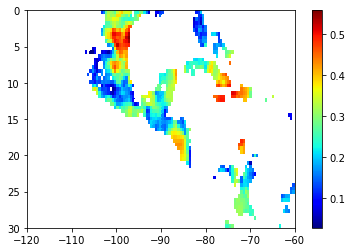

In [7]:
lon,lat=np.meshgrid(np.linspace(-120,-60,120),np.linspace(0,30,60))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.)
A = np.ma.array (imsd_climatology, mask=np.isnan(imsd_climatology)) 
plt.pcolormesh(lon,lat,A.transpose(),cmap='jet')#,vmin=0,vmax=0.7)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

### compare with matlab

In [10]:
MSD31_matlab=pd.read_csv('MSD31_matlab.csv')
MSD_MAT=MSD31_matlab.sort_values(['YEAR','XLOC','YLOC'])
MSD_PY=MSD_gs.sort_values(['YEAR','XLOC','YLOC'])

In [11]:
imsd_dif=MSD_PY['imsd'].values-MSD_MAT['imsd'].values
imsd_relchg=imsd_dif/MSD_MAT['imsd']

In [12]:
np.nanmax(abs(imsd_dif))

1.2490009027033011e-15

In [13]:
np.nanmax(imsd_relchg)

6.155077831074623e-15